<a href="https://colab.research.google.com/github/MouadEttali/Machine-Learning-Study-/blob/main/k_fold_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

let's start with normal train test validation

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()
X_train.shape , y_train.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

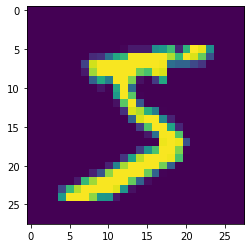

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [4]:
from sklearn.model_selection import train_test_split
X_val , X_test ,y_val , y_test = train_test_split(X_test, y_test,test_size=0.5)
X_val.shape , X_test.shape ,y_val.shape , y_test.shape

((5000, 28, 28), (5000, 28, 28), (5000,), (5000,))

In [9]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=14,max_depth=9)
rf.fit(X_train.reshape((60000,-1)),y_train)
rf_train_preds = rf.predict(X_train.reshape((60000,-1)))
rf_val_preds = rf.predict(X_val.reshape((5000,-1)))
accuracy_score(rf_train_preds,y_train), accuracy_score(rf_val_preds,y_val)

(0.9356166666666667, 0.923)

In [10]:
rf_test_preds= rf.predict(X_test.reshape((5000,-1)))
accuracy_score(rf_test_preds,y_test)

0.9234

# Now we try with cross validation 

In [11]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf, X_train.reshape((60000,-1)),y_train,cv=7)

array([0.92323845, 0.91273915, 0.92148857, 0.90526193, 0.91821258,
       0.92019601, 0.93419671])